# 빈도 분석 (Frequency Analysis)
빈도 분석은 특정 데이터에서 각 항목이 몇 번이나 나타나는지를 세어서 데이터의 특성을 파악하는 분석 방법입니다. 텍스트 데이터에서는 특정 단어나 형태소의 등장 횟수를 분석하여 핵심어나 주제를 파악하는 데 주로 사용됩니다.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Data/speeches_presidents.csv")
df

,president,value
0,문재인,정권교체 하겠습니다! 정치교체 하겠습니다! 시대교체 하겠습니다! ‘불비불...
1,박근혜,"존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대..."
2,이명박,"존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오늘 무거운 책임..."
3,노무현,어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많은 분들이 제게 ...


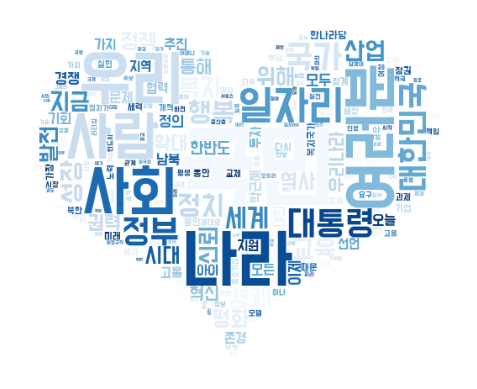

In [4]:
from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

okt = Okt()

text = ""

for i in df['value']:
    text += i
    text += '\n'

nouns = okt.nouns(text)

box = []

for i in nouns:
    if len(i) >= 2:
        box.append(i)

counter = Counter(box)

img = Image.open("Data/하트.png")
img = np.array(img)

wc = WordCloud(background_color="white", font_path="Data/BMDOHYEON_ttf.ttf", mask = img, colormap = "Blues")

cloud = wc.generate_from_frequencies(counter)

plt.imshow(cloud)
plt.axis("off")
plt.show()

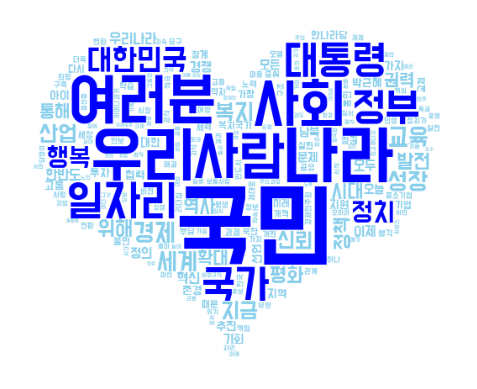

In [5]:
threshold = pd.Series(counter.values()).quantile(0.99)

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if counter[word] >= threshold:
        return "blue"
    else:
        return "skyblue"

wc = WordCloud(
    background_color="white",
    font_path="Data/BMDOHYEON_ttf.ttf",
    mask=img,
    color_func=custom_color_func  # colormap 대신 색상 함수를 지정
)

cloud = wc.generate_from_frequencies(counter)

plt.imshow(cloud)
plt.axis("off")
plt.show()

# 오즈비(Odds Ratio)
일반적인 빈도 분석이 특정 항목이나 단어가 데이터 내에서 얼마나 자주 나타나는지 단순 계산하는 것이라면, 오즈비(Odds Ratio, OR)는 두 개의 다른 그룹(예: 두 개의 다른 문서, 두 명의 다른 연설자) 간에 특정 사건(예: 특정 단어의 출현)이 발생할 '오즈(Odds)'를 비교하는 통계적 척도입니다. 즉, 한 그룹에서 어떤 단어가 나올 가능성이 다른 그룹에 비해 상대적으로 얼마나 높은지 또는 낮은지를 비율로 나타내는 것입니다.

오즈비는 주로 2x2 분할표(Contingency Table) 형태의 빈도 데이터를 분석할 때 사용됩니다. 텍스트 분석의 맥락에서 이를 적용한다면, 특정 단어의 출현 여부와 문서 또는 연설자의 종류라는 두 가지 범주형 변수 간의 연관성을 살펴보는 데 활용할 수 있습니다.

In [6]:
moon = df.iloc[0]['value']
park = df.iloc[1]['value']

In [7]:
moon_nouns = []
park_nouns = []

for i in okt.nouns(moon):
    if len(i) >= 2:
        moon_nouns.append(i)

for i in okt.nouns(park):
    if len(i) >= 2:
        park_nouns.append(i)

In [8]:
from collections import Counter

moon_dic = Counter(moon_nouns)
park_dic = Counter(park_nouns)

moon_df = pd.DataFrame(moon_dic.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
park_df = pd.DataFrame(park_dic.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

moon_df['President'] = "문재인"
park_df['President'] = "박근혜"

df = pd.concat([moon_df, park_df], ignore_index=True)
df

,word,count,President
0,나라,26,문재인
1,일자리,21,문재인
2,국민,21,문재인
3,우리,17,문재인
4,대통령,17,문재인
...,...,...,...
1078,길이,1,박근혜
1079,그대로,1,박근혜
1080,방식,1,박근혜
1081,지향,1,박근혜


In [9]:
pivot_df = df.pivot_table(index = "word", columns = "President", values = "count", aggfunc="sum", fill_value = 0)
pivot_df

President,문재인,박근혜
word,,
가난,0,1
가동,1,0
가득,1,0
가르침,1,0
가사,1,0
...,...,...
흐름,1,0
흡수,1,0
희망,4,0


In [10]:
pivot_df["ratio_moon"] = (pivot_df['문재인']+1) / sum(pivot_df['문재인']+1)
pivot_df["ratio_park"] = (pivot_df['박근혜']+1) / sum(pivot_df['박근혜']+1)
pivot_df

President,문재인,박근혜,ratio_moon,ratio_park
word,,,,
가난,0,1,0.000438,0.001143
가동,1,0,0.000876,0.000571
가득,1,0,0.000876,0.000571
가르침,1,0,0.000876,0.000571
가사,1,0,0.000876,0.000571
...,...,...,...,...
흐름,1,0,0.000876,0.000571
흡수,1,0,0.000876,0.000571
희망,4,0,0.002191,0.000571


In [11]:
pivot_df["Odds Ratio"] = pivot_df["ratio_moon"] / pivot_df["ratio_park"]
pivot_df.sort_values("Odds Ratio")

President,문재인,박근혜,ratio_moon,ratio_park,Odds Ratio
word,,,,,
행복,0,20,0.000438,0.012000,0.036518
박근혜,0,9,0.000438,0.005714,0.076687
과제,0,6,0.000438,0.004000,0.109553
핵심,0,5,0.000438,0.003429,0.127812
실천,0,5,0.000438,0.003429,0.127812
...,...,...,...,...,...
나라,26,3,0.011832,0.002286,5.176380
세상,6,0,0.003067,0.000571,5.368098
여성,6,0,0.003067,0.000571,5.368098


In [12]:
import numpy as np
pivot_df["Log Odds Ratio"] = np.log(pivot_df['Odds Ratio'])

result = pivot_df.sort_values("Log Odds Ratio")
result

President,문재인,박근혜,ratio_moon,ratio_park,Odds Ratio,Log Odds Ratio
word,,,,,,
행복,0,20,0.000438,0.012000,0.036518,-3.309959
박근혜,0,9,0.000438,0.005714,0.076687,-2.568022
과제,0,6,0.000438,0.004000,0.109553,-2.211347
핵심,0,5,0.000438,0.003429,0.127812,-2.057196
실천,0,5,0.000438,0.003429,0.127812,-2.057196
...,...,...,...,...,...,...
나라,26,3,0.011832,0.002286,5.176380,1.644106
세상,6,0,0.003067,0.000571,5.368098,1.680474
여성,6,0,0.003067,0.000571,5.368098,1.680474


In [13]:
A = result.head(10)
A.loc[:, '대통령'] = "박근혜"

B = result.tail(10)
B.loc[:, '대통령'] = "문재인"

result = pd.concat([A, B])
result

President,문재인,박근혜,ratio_moon,ratio_park,Odds Ratio,Log Odds Ratio,대통령
word,,,,,,,
행복,0,20,0.000438,0.012000,0.036518,-3.309959,박근혜
박근혜,0,9,0.000438,0.005714,0.076687,-2.568022,박근혜
과제,0,6,0.000438,0.004000,0.109553,-2.211347,박근혜
핵심,0,5,0.000438,0.003429,0.127812,-2.057196,박근혜
실천,0,5,0.000438,0.003429,0.127812,-2.057196,박근혜
운영,0,5,0.000438,0.003429,0.127812,-2.057196,박근혜
여러분,3,22,0.001753,0.013143,0.133369,-2.014636,박근혜
지식,0,4,0.000438,0.002857,0.153374,-1.874874,박근혜
다시,0,4,0.000438,0.002857,0.153374,-1.874874,박근혜


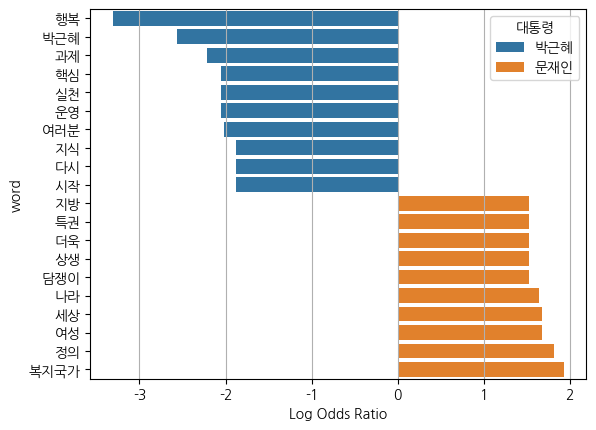

In [14]:
# !pip install koreanize-matplotlib

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

sns.barplot(data=result, x='Log Odds Ratio', y='word', hue='대통령')
plt.grid(axis = 'x')
plt.show()

## TF-IDF(Term Frequency-Inverse Document Frequency)
TF-IDF는 "Term Frequency-Inverse Document Frequency"의 줄임말로, 텍스트 분석에서 단어의 중요도를 평가하는 데 사용되는 통계적 방법입니다. 단순히 어떤 단어가 한 문서 내에 얼마나 자주 나타나는지(빈도 분석)만으로는 그 단어의 중요성을 제대로 파악하기 어렵습니다. 예를 들어, "은", "는", "이", "가"와 같은 조사나 흔한 단어들은 어떤 문서에서든 자주 나타나지만, 그 문서의 내용을 특징짓는 중요한 단어라고 보기는 어렵습니다.

TF-IDF는 이러한 한계를 극복하기 위해 고안되었습니다. 특정 단어가 한 문서 내에서 얼마나 자주 나타나는지(TF)와 그 단어가 전체 문서 모음(코퍼스)에서 얼마나 드물게 나타나는지(IDF)를 함께 고려하여 단어의 중요도를 계산합니다.

In [15]:
okt = Okt()

def make_nouns(x):
    nouns = okt.nouns(x)
    box = []
    for i in nouns:
        if len(i) >= 2:
            box.append(i)
    return box

df = pd.read_csv('Data/speeches_presidents.csv')
df['nouns'] = df['value'].apply(make_nouns)
df

,president,value,nouns
0,문재인,정권교체 하겠습니다! 정치교체 하겠습니다! 시대교체 하겠습니다! ‘불비불...,"[정권, 교체, 정치, 교체, 시대, 교체, 불비, 불명, 고사, 남쪽, 언덕, 나..."
1,박근혜,"존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대...","[존경, 국민, 여러분, 오늘, 국민, 대한민국, 만들기, 위해, 모든, 각오, 자..."
2,이명박,"존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오늘 무거운 책임...","[존경, 국민, 여러분, 사랑, 한나라당, 당원, 동지, 여러분, 오늘, 책임감, ..."
3,노무현,어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많은 분들이 제게 ...,"[부터, 대통령, 시작, 무엇, 무엇, 비젼, 비젼, 생각, 마음, 가장, 비젼, ..."


In [16]:
unique_words = set()
for i in df['nouns']:
    for j in i:
        unique_words.add(j)
print(unique_words)

{'회안', '때문', '생산', '수천', '천적', '행정', '인도', '휴전선', '정규직', '금융인', '노후', '대가', '우선', '전략', '기업', '거기', '단계', '지방', '파탄', '과오', '선진국', '지금', '계층', '종사', '존립', '북핵문제', '현장', '독재', '뚜벅뚜벅', '좌절', '생애', '매몰', '반칙', '기회', '학생', '아이디어', '믿음', '수준', '성공', '영업', '남쪽', '중단', '혁신도시', '한국', '완성', '사람', '서비스', '진전', '네트워크', '권력자', '대체', '개혁', '계란', '영향', '융성', '총리와', '가훈', '희망', '언제', '내년', '비롯', '보수', '동안', '창업', '경제성장', '과학', '각국', '지도', '방법', '근간', '남녀', '지역', '활성화', '우뚝', '협동', '이익', '전세계', '넣기', '계획', '뒤흔듭니', '민족', '설악산', '용적', '공유', '투자가', '바이오', '사업', '교체', '잠재', '자영', '남북한', '근로', '전장', '애국', '현실', '내용', '뒷방', '이상', '관심', '무슨', '눈치', '과거', '여기', '주먹', '사고', '차지', '정착', '운명', '어머니', '베이징', '경쟁', '인정', '공공', '여가', '의존', '소비', '누구', '자체', '생태', '독려', '관광', '협동조합', '견인', '서울', '종류', '부터', '유년', '지식', '상처', '보완', '시작', '공약', '목숨', '해주시', '공적', '공식', '협력', '협업', '심판', '열기', '서나', '고통', '상생', '행세', '생활', '도쿄', '마음대로', '마련', '군사', '시장', '인간', '모두', '정치인', '전반', '목표', '모작', '국제사회', '만능', '최선', '부처', '투

In [20]:
# DF : 단어가 몇개의 문서(대통령)에 출현했는지
DF_dic = {}
for i in unique_words:
    count = 0
    for j in df['nouns']:
        if i in j:
            count += 1
    DF_dic[i] = count
print(DF_dic)

{'회안': 1, '때문': 2, '생산': 1, '수천': 1, '천적': 1, '행정': 1, '인도': 1, '휴전선': 1, '정규직': 1, '금융인': 1, '노후': 2, '대가': 1, '우선': 1, '전략': 2, '기업': 2, '거기': 1, '단계': 1, '지방': 1, '파탄': 1, '과오': 1, '선진국': 1, '지금': 4, '계층': 2, '종사': 1, '존립': 1, '북핵문제': 2, '현장': 2, '독재': 1, '뚜벅뚜벅': 1, '좌절': 1, '생애': 1, '매몰': 1, '반칙': 1, '기회': 4, '학생': 2, '아이디어': 1, '믿음': 1, '수준': 2, '성공': 1, '영업': 1, '남쪽': 1, '중단': 1, '혁신도시': 1, '한국': 3, '완성': 1, '사람': 4, '서비스': 2, '진전': 1, '네트워크': 2, '권력자': 1, '대체': 1, '개혁': 3, '계란': 1, '영향': 1, '융성': 1, '총리와': 1, '가훈': 1, '희망': 2, '언제': 1, '내년': 1, '비롯': 1, '보수': 1, '동안': 4, '창업': 1, '경제성장': 1, '과학': 1, '각국': 1, '지도': 1, '방법': 1, '근간': 1, '남녀': 1, '지역': 3, '활성화': 2, '우뚝': 1, '협동': 2, '이익': 1, '전세계': 1, '넣기': 1, '계획': 1, '뒤흔듭니': 1, '민족': 1, '설악산': 1, '용적': 1, '공유': 2, '투자가': 1, '바이오': 1, '사업': 2, '교체': 3, '잠재': 1, '자영': 1, '남북한': 2, '근로': 1, '전장': 1, '애국': 1, '현실': 1, '내용': 1, '뒷방': 1, '이상': 2, '관심': 1, '무슨': 2, '눈치': 1, '과거': 4, '여기': 1, '주먹': 1, '사고': 1, '차지': 1, '정착': 2, '운명': 1, 

In [21]:
df2 = df.explode('nouns')[['president', 'nouns']]
df2

,president,nouns
0,문재인,정권
0,문재인,교체
0,문재인,정치
0,문재인,교체
0,문재인,시대
...,...,...
3,노무현,후보
3,노무현,경선
3,노무현,공식
3,노무현,선언


In [22]:
# TF (Term Frequency: 단어 빈도)
df3 = df2.groupby(['president', 'nouns']).size().reset_index(name = 'TF')
df3

,president,nouns,TF
0,노무현,가면,1
1,노무현,가슴,2
2,노무현,가야,1
3,노무현,가장,1
4,노무현,가지,1
...,...,...,...
1521,이명박,혼자,1
1522,이명박,환기,1
1523,이명박,후보,1
1524,이명박,희망,2


In [23]:
def make_DF(x):
    return DF_dic[x]

df3['DF'] = df3['nouns'].apply(make_DF)
df3

,president,nouns,TF,DF
0,노무현,가면,1,1
1,노무현,가슴,2,3
2,노무현,가야,1,3
3,노무현,가장,1,4
4,노무현,가지,1,4
...,...,...,...,...
1521,이명박,혼자,1,2
1522,이명박,환기,1,1
1523,이명박,후보,1,3
1524,이명박,희망,2,2


In [24]:
import numpy as np

df3['IDF'] = np.log(4 / df3['DF'])
df3

,president,nouns,TF,DF,IDF
0,노무현,가면,1,1,1.386294
1,노무현,가슴,2,3,0.287682
2,노무현,가야,1,3,0.287682
3,노무현,가장,1,4,0.000000
4,노무현,가지,1,4,0.000000
...,...,...,...,...,...
1521,이명박,혼자,1,2,0.693147
1522,이명박,환기,1,1,1.386294
1523,이명박,후보,1,3,0.287682
1524,이명박,희망,2,2,0.693147


In [25]:
df3['TF-IDF'] = df3['TF'] * df3['IDF']
df3

,president,nouns,TF,DF,IDF,TF-IDF
0,노무현,가면,1,1,1.386294,1.386294
1,노무현,가슴,2,3,0.287682,0.575364
2,노무현,가야,1,3,0.287682,0.287682
3,노무현,가장,1,4,0.000000,0.000000
4,노무현,가지,1,4,0.000000,0.000000
...,...,...,...,...,...,...
1521,이명박,혼자,1,2,0.693147,0.693147
1522,이명박,환기,1,1,1.386294,1.386294
1523,이명박,후보,1,3,0.287682,0.287682
1524,이명박,희망,2,2,0.693147,1.386294


In [26]:
df3[df3['president'] == '문재인'].sort_values('TF-IDF', ascending = False)[['president', 'nouns','TF-IDF']].head(10)

,president,nouns,TF-IDF
493,문재인,복지국가,11.090355
529,문재인,산업,9.704061
623,문재인,여성,8.317766
895,문재인,확대,7.624619
358,문재인,나라,7.479734
647,문재인,우리나라,6.931472
532,문재인,상생,6.931472
390,문재인,담쟁이,6.931472
782,문재인,지방,6.931472
488,문재인,보통사람,6.931472


In [27]:
df

,president,value,nouns
0,문재인,정권교체 하겠습니다! 정치교체 하겠습니다! 시대교체 하겠습니다! ‘불비불...,"[정권, 교체, 정치, 교체, 시대, 교체, 불비, 불명, 고사, 남쪽, 언덕, 나..."
1,박근혜,"존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대...","[존경, 국민, 여러분, 오늘, 국민, 대한민국, 만들기, 위해, 모든, 각오, 자..."
2,이명박,"존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오늘 무거운 책임...","[존경, 국민, 여러분, 사랑, 한나라당, 당원, 동지, 여러분, 오늘, 책임감, ..."
3,노무현,어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많은 분들이 제게 ...,"[부터, 대통령, 시작, 무엇, 무엇, 비젼, 비젼, 생각, 마음, 가장, 비젼, ..."


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

model = TfidfVectorizer()

df['cb_nouns'] = df['nouns'].apply(lambda x : " ".join(x))

tf_idf = model.fit_transform(df['cb_nouns'])
tf_idf

<4x1120 sparse matrix of type '<class 'numpy.float64'>'
	with 1526 stored elements in Compressed Sparse Row format>

In [29]:
result = pd.DataFrame(tf_idf.toarray(), index = df['president'], columns = model.get_feature_names_out())
result

,가난,가동,가득,가르침,가면,가사,가슴,가야,가장,가족,...,후보,훈련,훗날,휴전선,흉탄,흐름,흡수,희망,희망이,희생
president,,,,,,,,,,,,,,,,,,,,,
문재인,0.00000,0.016866,0.016866,0.016866,0.000000,0.016866,0.021531,0.021531,0.026404,0.021531,...,0.000000,0.00000,0.016866,0.016866,0.00000,0.016866,0.016866,0.053190,0.00000,0.026595
박근혜,0.01738,0.000000,0.000000,0.000000,0.000000,0.000000,0.011094,0.011094,0.027209,0.011094,...,0.011094,0.01738,0.000000,0.000000,0.01738,0.000000,0.000000,0.000000,0.01738,0.000000
이명박,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018135,0.022182,...,0.022182,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.054798,0.00000,0.027399
노무현,0.00000,0.000000,0.000000,0.000000,0.037357,0.000000,0.047688,0.023844,0.019494,0.000000,...,0.071533,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000


In [30]:
columns = model.get_feature_names_out()

for i in range(len(result)):
    a = result.iloc[i]
    idx = np.argsort(a)[::-1][:10]
    print(result.index[i], columns[idx])

문재인 ['나라' '일자리' '산업' '국민' '우리' '대통령' '확대' '사회' '성장' '복지국가']
박근혜 ['국민' '행복' '정부' '여러분' '박근혜' '국가' '신뢰' '교육' '일자리' '사람']
이명박 ['나라' '대한민국' '국민' '세계' '리더십' '국가' '여러분' '한나라당' '일류' '동지']
노무현 ['정계' '권력' '비젼' '개편' '공식' '우리' '정치' '역사' '국민' '대통령']


# 연습문제 (Okt 형태소 분석기 활용)
1. 이명박 대통령과 노무현 대통령 연설문의 Odds Ratio 값을 사용해서 각 대통령별로 어떤 단어가 중요하게 사용되었는지 찾아보세요.

In [42]:
df = pd.read_excel("Data/Speeches_President.xlsx")

print(df)

lee = df.loc[2]["value"]
no = df.loc[3]["value"]

  president                                              value
0       문재인  정권교체 하겠습니다!   정치교체 하겠습니다!   시대교체 하겠습니다!   ‘불비불...
1       박근혜  존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대...
2       이명박  존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오늘 무거운 책임...
3       노무현  어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많은 분들이 제게 ...
4       이재명  존경하고 사랑하는 국민 여러분, 여러분이 선택해 주신 대한민국 제21대 대통령 이재...


In [43]:
from konlpy.tag import Okt
okt = Okt()

lee_nouns = [i for i in okt.nouns(lee) if len(i) >= 2]
no_nouns = [i for i in okt.nouns(no) if len(i) >= 2]

lee_dic = Counter(lee_nouns)
no_dic = Counter(no_nouns)

lee_df = pd.DataFrame(lee_dic.items(), columns = ["word", "count"])
no_df = pd.DataFrame(no_dic.items(), columns = ["word", "count"])

lee_df["President"] = "이명박"
no_df["President"] = "노무현"

df = pd.concat([lee_df, no_df])
df

,word,count,President
0,존경,4,이명박
1,국민,13,이명박
2,여러분,11,이명박
3,사랑,5,이명박
4,한나라당,7,이명박
...,...,...,...
227,선언,3,노무현
228,공식,6,노무현
229,자꾸,1,노무현
230,신문,1,노무현


In [45]:
pivot_df = df.pivot_table(index = "word", columns = "President", 
                          values = "count", aggfunc = "sum").fillna(0)

pivot_df["lee_ratio"] = (pivot_df["이명박"]+1) / sum(pivot_df["이명박"]+1)
pivot_df["no_ratio"] = (pivot_df["노무현"]+1) / sum(pivot_df["노무현"]+1) 

pivot_df["odds_ratio"] = pivot_df["lee_ratio"] / pivot_df["no_ratio"] 
pivot_df["log_odds_ratio"] = np.log(pivot_df["odds_ratio"]) 
pivot_df = pivot_df.sort_values("log_odds_ratio", ascending = True)

A = pivot_df.head(10) 
B = pivot_df.tail(10)  

A["대통령"] = "이명박"
B["대통령"] = "노무현"

result = pd.concat([A, B])
result

President,노무현,이명박,lee_ratio,no_ratio,odds_ratio,log_odds_ratio,대통령
word,,,,,,,
권력,9.0,0.0,0.001245,0.012579,0.099004,-2.312598,이명박
정계,8.0,0.0,0.001245,0.011321,0.110004,-2.207237,이명박
공식,6.0,0.0,0.001245,0.008805,0.141434,-1.955923,이명박
개편,6.0,0.0,0.001245,0.008805,0.141434,-1.955923,이명박
비젼,6.0,0.0,0.001245,0.008805,0.141434,-1.955923,이명박
정의,4.0,0.0,0.001245,0.006289,0.198007,-1.619451,이명박
지역,4.0,0.0,0.001245,0.006289,0.198007,-1.619451,이명박
정치,8.0,1.0,0.002491,0.011321,0.220008,-1.514090,이명박
이제,3.0,0.0,0.001245,0.005031,0.247509,-1.396307,이명박


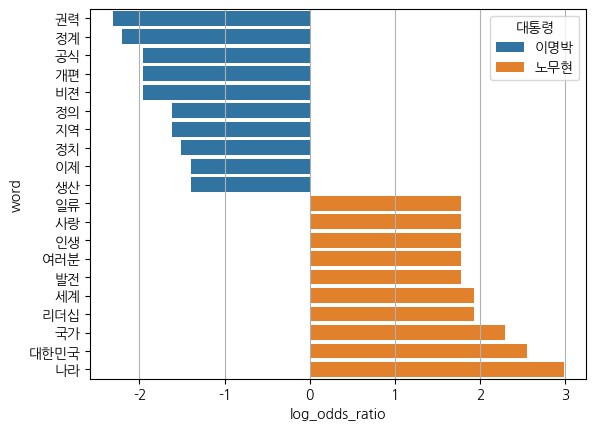

In [46]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=result, x = "log_odds_ratio", y = "word", hue = "대통령")
plt.grid(axis = "x")
plt.show()

2. 모든 대통령의 연설문을 합쳐서 명사를 추출하고, 빈도 분석을 한 후에 워드클라우드를 그려보세요.

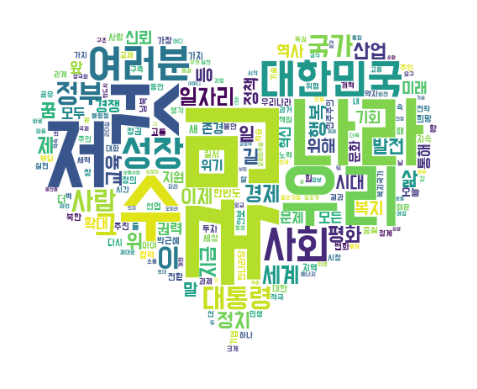

In [57]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt

df = pd.read_excel("Data/Speeches_President.xlsx")

text_all = " ".join(df["value"].tolist())

okt = Okt()

nouns = okt.nouns(text_all)

count = Counter(nouns)

wc = WordCloud(background_color="white",
                font_path = "Data/BMDOHYEON_ttf.ttf",
               mask = img).generate_from_frequencies(count)

plt.imshow(wc)
plt.axis("off")
plt.show()